In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
data = pd.read_csv('Data_2.csv')

In [ ]:
data['Date of Travel'] =  pd.to_datetime(data["Date of Travel"], dayfirst=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Transaction ID               359392 non-null  int64         
 1   Customer ID                  359392 non-null  int64         
 2   Payment_Mode                 359392 non-null  object        
 3   Customer Gender              359392 non-null  object        
 4   Customer Age                 359392 non-null  int64         
 5   Customer Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel               359392 non-null  datetime64[ns]
 7   Cab Company                  359392 non-null  object        
 8   City                         359392 non-null  object        
 9   Distance Travelled(KM)       359392 non-null  float64       
 10  Price Charged (USD)          359392 non-null  float64       
 11  Cost of Trip (USD)        

In [ ]:
data['day'] = data['Date of Travel'].dt.day
data['month'] = data['Date of Travel'].dt.month
data['year'] = data['Date of Travel'].dt.year

In [ ]:
data

,Transaction ID,Customer ID,Payment_Mode,Customer Gender,Customer Age,Customer Income (USD/Month),Date of Travel,Cab Company,City,Distance Travelled(KM),...,Cost of Trip (USD),City Population,City Users,Profit,Profit per KM,Percentage of Users,Quarter,day,month,year
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,...,313.6350,814885,24701,57.3150,1.882266,0.0303,Q1,8,1,2016
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,...,334.8540,814885,24701,23.6660,0.826904,0.0303,Q1,6,1,2016
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,...,97.6320,814885,24701,27.5680,3.049558,0.0303,Q1,2,1,2016
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,...,351.6020,814885,24701,25.7980,0.777751,0.0303,Q1,7,1,2016
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,...,97.7760,814885,24701,16.8440,1.929439,0.0303,Q1,3,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,...,63.3600,418859,127001,5.8800,1.225000,0.3032,Q1,8,1,2018
359388,10440104,53286,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,...,106.8480,418859,127001,6.9020,0.821667,0.3032,Q1,4,1,2018
359389,10440105,52265,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,...,349.6500,418859,127001,87.4200,3.150270,0.3032,Q1,5,1,2018
359390,10440106,52175,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,...,114.0480,418859,127001,32.1420,3.652500,0.3032,Q1,5,1,2018


In [ ]:
data.isna().sum()

Transaction ID                 0
Customer ID                    0
Payment_Mode                   0
Customer Gender                0
Customer Age                   0
Customer Income (USD/Month)    0
Date of Travel                 0
Cab Company                    0
City                           0
Distance Travelled(KM)         0
Price Charged (USD)            0
Cost of Trip (USD)             0
City Population                0
City Users                     0
Profit                         0
Profit per KM                  0
Percentage of Users            0
Quarter                        0
day                            0
month                          0
year                           0
dtype: int64

In [ ]:
data_train = data.drop(['Transaction ID','Customer ID','Customer Gender','Customer Age','Customer Income (USD/Month)','Date of Travel','Price Charged (USD)','Cost of Trip (USD)','City Population','City Users','Profit per KM'], axis = 1)

In [ ]:
data_train

,Payment_Mode,Cab Company,City,Distance Travelled(KM),Profit,Percentage of Users,Quarter,day,month,year
0,Card,Pink Cab,ATLANTA GA,30.45,57.3150,0.0303,Q1,8,1,2016
1,Card,Pink Cab,ATLANTA GA,28.62,23.6660,0.0303,Q1,6,1,2016
2,Cash,Pink Cab,ATLANTA GA,9.04,27.5680,0.0303,Q1,2,1,2016
3,Cash,Pink Cab,ATLANTA GA,33.17,25.7980,0.0303,Q1,7,1,2016
4,Card,Pink Cab,ATLANTA GA,8.73,16.8440,0.0303,Q1,3,1,2016
...,...,...,...,...,...,...,...,...,...,...
359387,Cash,Yellow Cab,WASHINGTON DC,4.80,5.8800,0.3032,Q1,8,1,2018
359388,Cash,Yellow Cab,WASHINGTON DC,8.40,6.9020,0.3032,Q1,4,1,2018
359389,Cash,Yellow Cab,WASHINGTON DC,27.75,87.4200,0.3032,Q1,5,1,2018
359390,Card,Yellow Cab,WASHINGTON DC,8.80,32.1420,0.3032,Q1,5,1,2018


In [ ]:
data_train.describe()

,Distance Travelled(KM),Profit,Percentage of Users,day,month,year
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,137.253198,0.106673,15.628447,7.500434,2017.045199
std,12.233526,160.311840,0.106338,8.827151,3.445095,0.800239
min,1.900000,-220.060000,0.006500,1.000000,1.000000,2016.000000
25%,12.000000,28.012000,0.035900,8.000000,5.000000,2016.000000
50%,22.440000,81.962000,0.073000,16.000000,8.000000,2017.000000
75%,32.960000,190.030000,0.090400,23.000000,10.000000,2018.000000
max,48.000000,1463.966000,0.321400,31.000000,12.000000,2018.000000


In [ ]:
labelencoder = LabelEncoder()
data_encoded = pd.DataFrame(())

In [ ]:
for i in data_train.columns:
    data_encoded[i] = labelencoder.fit_transform(data_train[i])

In [ ]:
data_encoded

,Payment_Mode,Cab Company,City,Distance Travelled(KM),Profit,Percentage of Users,Quarter,day,month,year
0,0,0,0,615,80062,11,0,7,0,0
1,0,0,0,579,45437,11,0,5,0,0
2,1,0,0,172,49798,11,0,1,0,0
3,1,0,0,672,47833,11,0,6,0,0
4,0,0,0,165,37730,11,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
359387,1,1,18,78,24624,17,0,7,0,2
359388,1,1,18,159,25865,17,0,3,0,2
359389,1,1,18,563,105496,17,0,4,0,2
359390,0,1,18,166,54779,17,0,4,0,2


In [ ]:
X = data_encoded.drop(columns='Profit')

In [ ]:
y = data_encoded['Profit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.score(X_test,y_test)

0.4044873138385201

##K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_reg.score(X_test, y_test)

0.5689460681753193

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.score(X_test, y_test)

0.7888966486806586

##Making Future Predictions

In [ ]:
preds = pd.read_csv('preds.csv')

In [ ]:
preds

,Payment_Mode,Cab Company,City,Distance Travelled(KM),Percentage of Users,Quarter,day,month,year
0,1,0,18,1.49,8,2,20,6,2016
1,0,1,6,5.80,9,1,2,5,2019
2,0,1,18,76.64,7,3,2,10,2023
3,0,1,2,4.83,4,0,7,0,2016
4,0,0,16,85.97,16,2,5,7,2021
...,...,...,...,...,...,...,...,...,...
359390,0,0,16,73.77,17,1,3,4,2019
359391,0,1,14,26.80,15,2,20,8,2018
359392,0,1,1,1.49,5,2,20,6,2022
359393,0,0,8,5.80,16,1,2,5,2024


In [ ]:
preds_encoded = pd.DataFrame()

In [ ]:
for i in preds:
    preds_encoded[i] = labelencoder.fit_transform(preds[i])

In [ ]:
preds_encoded

,Payment_Mode,Cab Company,City,Distance Travelled(KM),Percentage of Users,Quarter,day,month,year
0,1,0,18,49,8,2,19,6,0
1,0,1,6,480,9,1,1,5,3
2,0,1,18,7564,7,3,1,10,7
3,0,1,2,383,4,0,6,0,0
4,0,0,16,8497,16,2,4,7,5
...,...,...,...,...,...,...,...,...,...
359390,0,0,16,7277,17,1,2,4,3
359391,0,1,14,2580,15,2,19,8,2
359392,0,1,1,49,5,2,19,6,6
359393,0,0,8,480,16,1,1,5,8


In [ ]:
future_profit_predictions = rf.predict(preds_encoded)

In [ ]:
future_profit_predictions

array([ 24326.09, 178704.36, 187464.18, ...,  42150.33,  50239.57,
       169439.48])

In [ ]:
future_pred = pd.DataFrame({ 'Profit': future_profit_predictions })

In [ ]:
future_pred

,Profit
0,24326.09
1,178704.36
2,187464.18
3,126925.50
4,84109.79
...,...
359390,121168.22
359391,160232.33
359392,42150.33
359393,50239.57


In [ ]:
preds = pd.concat([preds,future_pred], axis=1)

In [ ]:
preds

,Payment_Mode,Cab Company,City,Distance Travelled(KM),Percentage of Users,Quarter,day,month,year,Profit
0,1,0,18,1.49,8,2,20,6,2016,24326.09
1,0,1,6,5.80,9,1,2,5,2019,178704.36
2,0,1,18,76.64,7,3,2,10,2023,187464.18
3,0,1,2,4.83,4,0,7,0,2016,126925.50
4,0,0,16,85.97,16,2,5,7,2021,84109.79
...,...,...,...,...,...,...,...,...,...,...
359390,0,0,16,73.77,17,1,3,4,2019,121168.22
359391,0,1,14,26.80,15,2,20,8,2018,160232.33
359392,0,1,1,1.49,5,2,20,6,2022,42150.33
359393,0,0,8,5.80,16,1,2,5,2024,50239.57


In [ ]:
preds['Cab Company'] = preds['Cab Company'].map({0: 'Pink Cab', 1: 'Yellow Cab'})

<ipython-input-85-1f0e2cb063c7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)


[Text(2015.0, 0, '2015'),
 Text(2016.0, 0, '2016'),
 Text(2017.0, 0, '2017'),
 Text(2018.0, 0, '2018'),
 Text(2019.0, 0, '2019'),
 Text(2020.0, 0, '2020'),
 Text(2021.0, 0, '2021'),
 Text(2022.0, 0, '2022'),
 Text(2023.0, 0, '2023'),
 Text(2024.0, 0, '2024'),
 Text(2025.0, 0, '2025')]

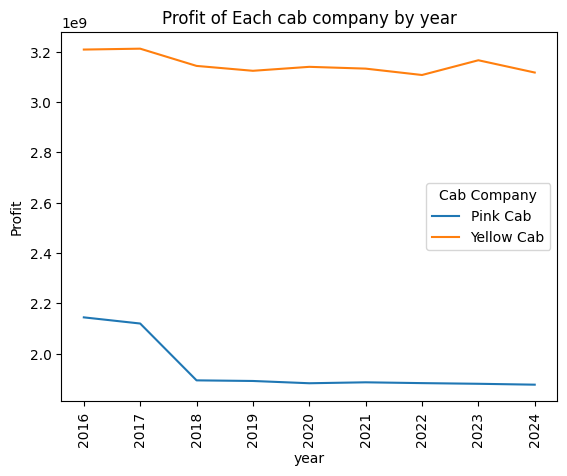

In [ ]:
data_grouped = preds.groupby(['year', 'Cab Company'])['Profit'].sum().reset_index()

plot = sns.lineplot(data=data_grouped, x='year', y='Profit', hue='Cab Company')
plot.set_title("Profit of Each cab company by year")
plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)